<a href="https://colab.research.google.com/github/AanchalDogra/stockpriceprediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['ZOMATO.NS', 'ANGELONE.NS', 'RELIANCE.NS', 'JUBLFOOD.NS']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

ZOMATO = yf.download(tech_list[0],start,end)
ANGELONE = yf.download(tech_list[1],start,end)
RELIANCE = yf.download(tech_list[2],start,end)
JUBLFOOD = yf.download(tech_list[3],start,end)




company_list = [ZOMATO, ANGELONE, RELIANCE,JUBLFOOD]
company_name = ["ZOMATO", "ANGEL", "RELIANCE", "JUBILANT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-07-14,473.500000,477.350006,468.500000,470.700012,470.700012,1214997,JUBILANT
2023-07-17,473.000000,475.799988,470.750000,474.850006,474.850006,1359337,JUBILANT
2023-07-18,475.899994,477.000000,468.500000,470.799988,470.799988,2200964,JUBILANT
2023-07-19,471.000000,477.000000,469.950012,476.000000,476.000000,1347007,JUBILANT
2023-07-20,476.000000,477.750000,470.149994,473.049988,473.049988,1053824,JUBILANT
2023-07-21,472.850006,476.549988,464.750000,466.950012,466.950012,1255877,JUBILANT
2023-07-24,466.500000,471.600006,465.500000,467.000000,467.000000,1340737,JUBILANT
2023-07-25,468.950012,488.899994,465.049988,476.649994,476.649994,6580064,JUBILANT
2023-07-26,472.000000,472.950012,459.950012,467.950012,467.950012,4298762,JUBILANT


In [24]:
ZOMATO.describe()

,Open,High,Low,Close,Adj Close,Volume
count,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02
mean,61.867004,63.152227,60.627733,61.820648,61.820648,8.788150e+07
std,8.545177,8.634810,8.525963,8.578543,8.578543,8.485354e+07
min,44.900002,46.299999,43.049999,45.700001,45.700001,0.000000e+00
25%,54.449999,55.650000,53.250000,54.425001,54.425001,4.290086e+07
50%,62.599998,63.500000,61.400002,62.150002,62.150002,6.123706e+07
75%,65.349998,66.825001,64.299999,65.350002,65.350002,8.797294e+07
max,84.000000,86.099998,82.800003,84.949997,84.949997,5.996883e+08


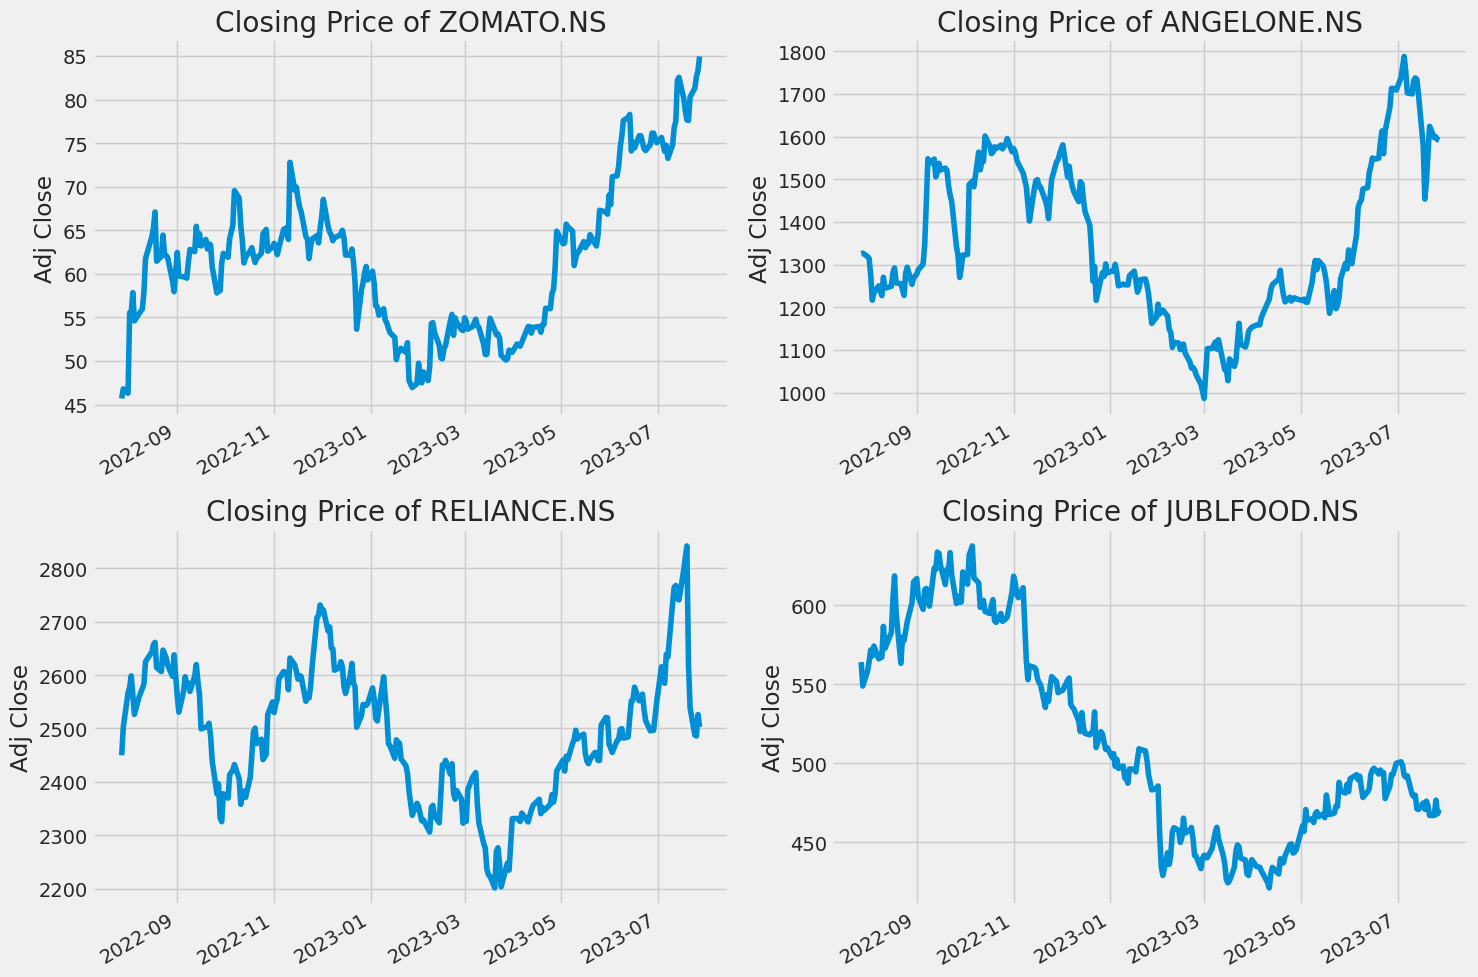

In [25]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

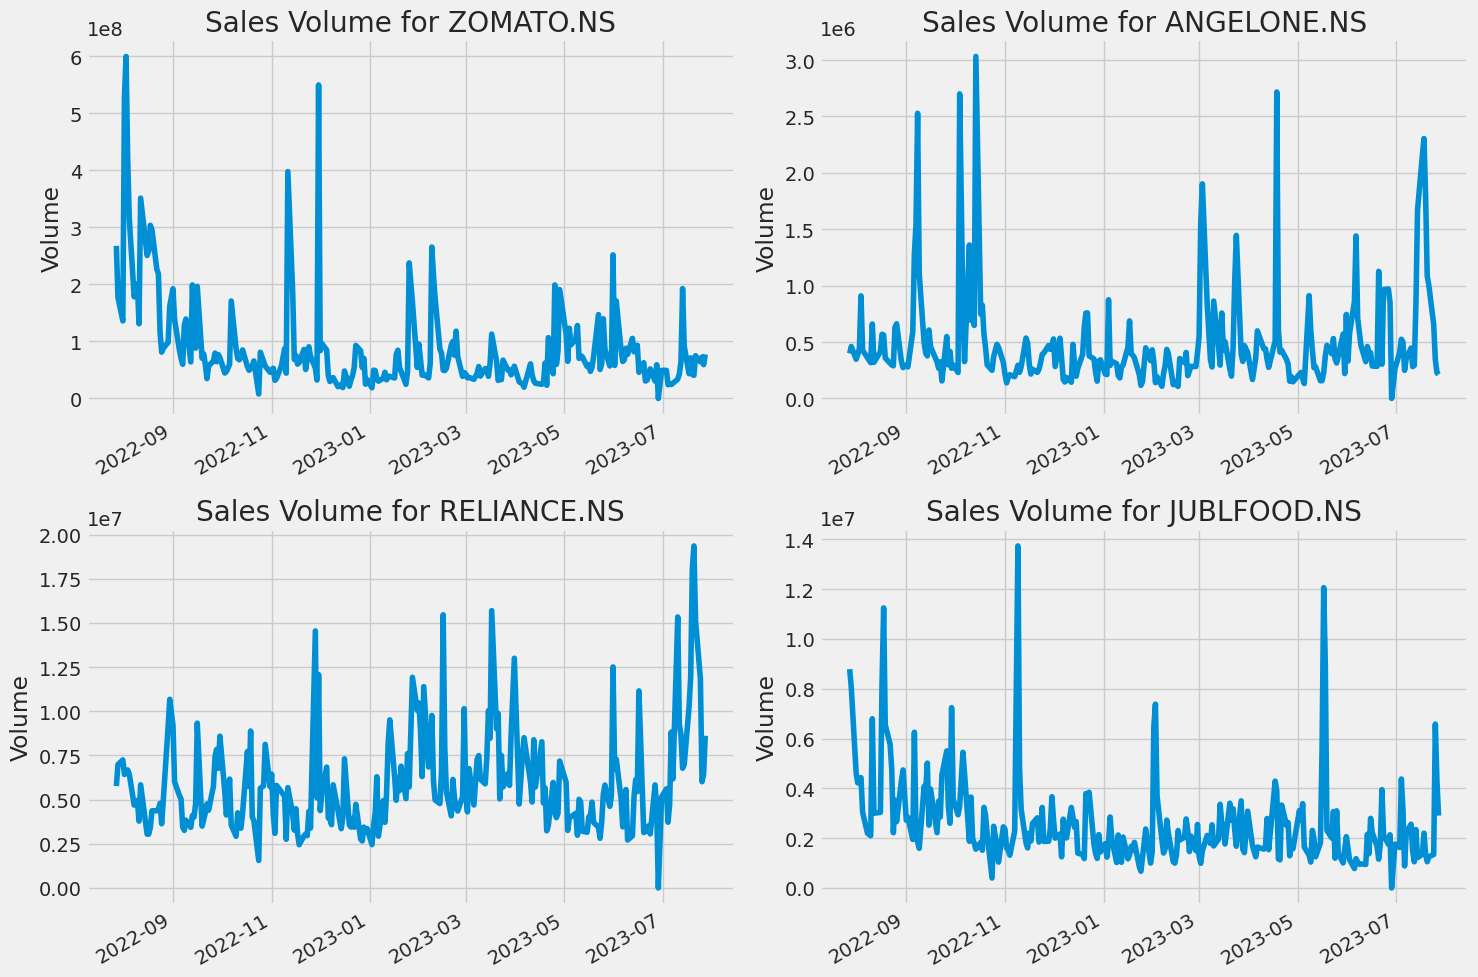

In [26]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

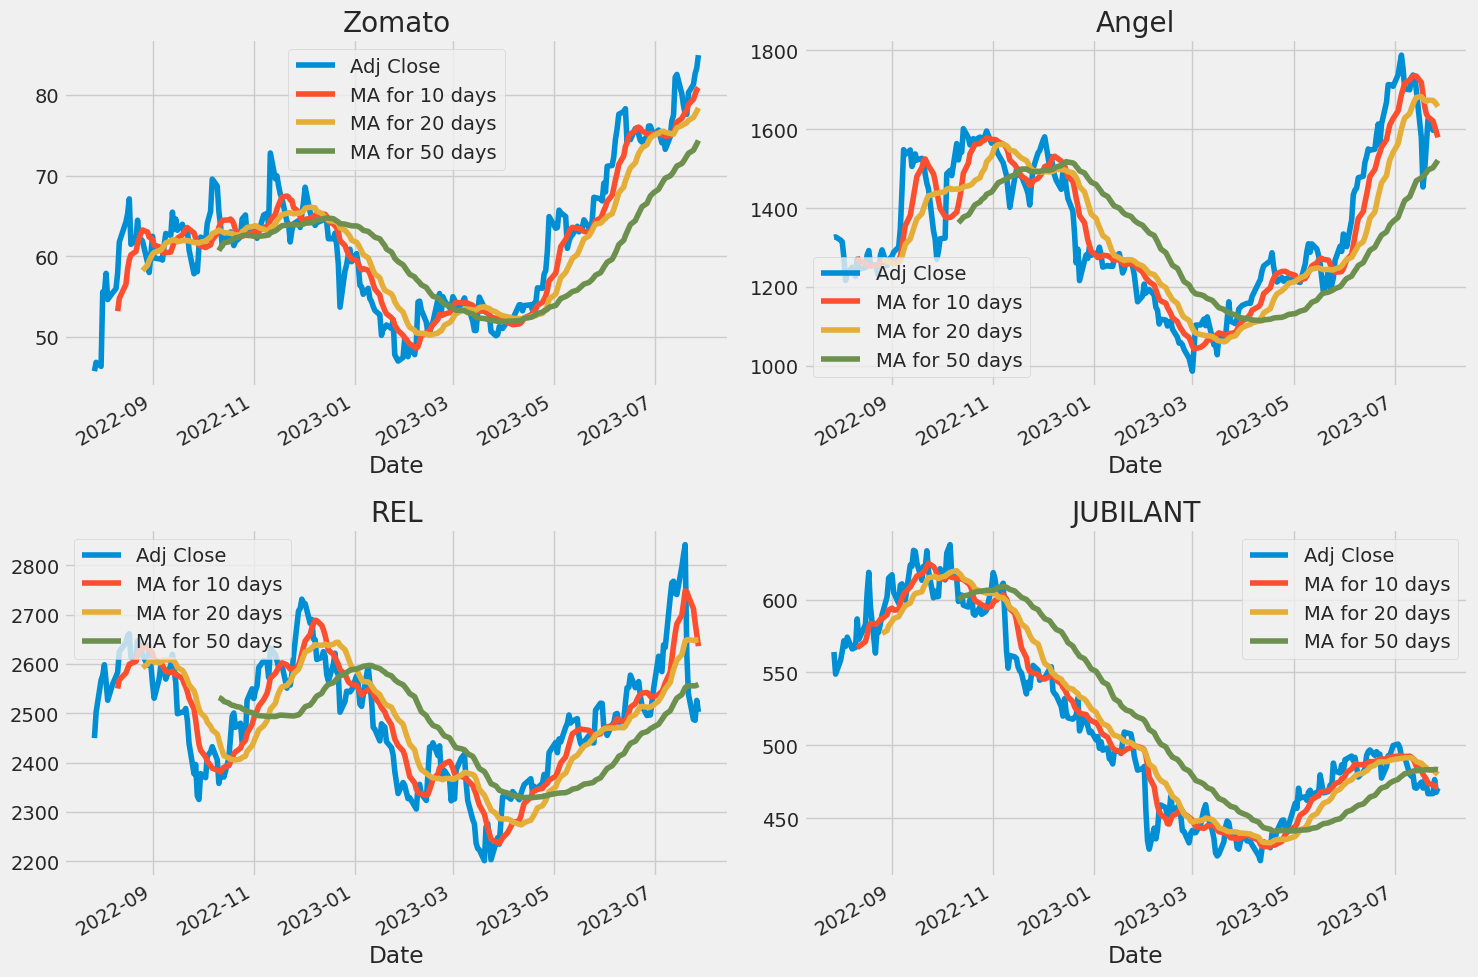

In [29]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

ZOMATO[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('Zomato')

ANGELONE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('Angel')

RELIANCE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('REL')

JUBLFOOD[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('JUBILANT')

fig.tight_layout()

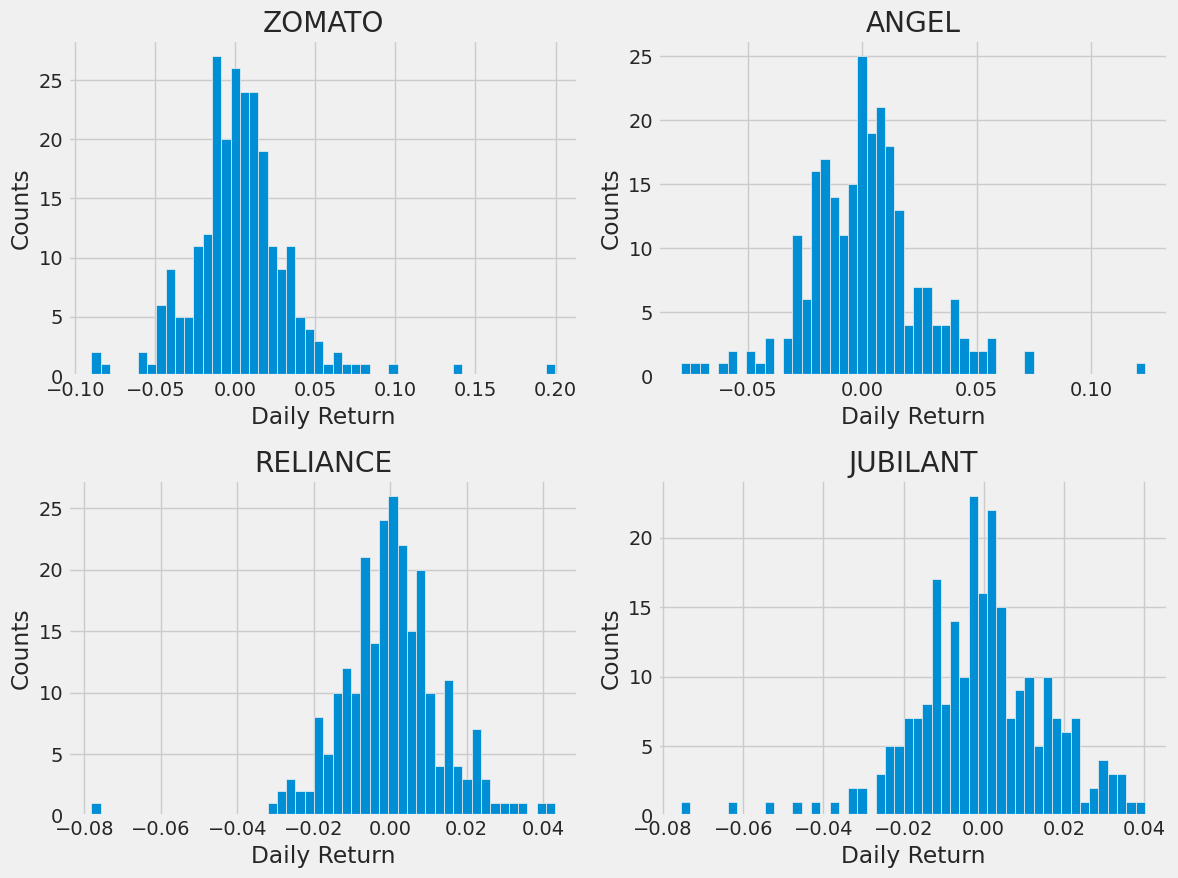

In [31]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()